In [1]:
#pip install wordcloud


     -------------------------------------- 153.1/153.1 kB 4.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import warnings
import regex as re
warnings.filterwarnings('ignore')#to filter all the warnings
import seaborn as sns
pd.set_option('float_format', '{:.4f}'.format)# to keep the float values short
# Import for wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import fot plotly
import plotly.express as px

In [38]:
df = pd.read_csv('youtube_data.csv')

In [39]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,category_name
0,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,JYP Entertainment,10,2020-08-15T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,10241569,846466,21984,42682,ITZY Not Shy M/V[ITZY Official] https://www.yo...,Music
1,JvjvbBDqdgw,BTS (방탄소년단) Sing 'Dynamite' with me,2020-08-22T22:00:01Z,BANGTANTV,10,2020-08-23T00:00:00Z,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,6251656,2148368,5473,116057,#Sing_Dynamite #BTS_Dynamite #LipSyncParty #BT...,Music
2,BV2FdDmGiW0,BTS (방탄소년단) 'Dynamite' Official MV (B-side),2020-08-24T15:00:01Z,Big Hit Labels,10,2020-08-31T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,45596902,5951288,97683,382374,BTS (방탄소년단) 'Dynamite' Official MV (B-side)Cre...,Music
3,sj9J2ecsSpo,WandaVision | Official Trailer | Disney+,2020-09-21T01:03:04Z,Marvel Entertainment,24,2020-09-25T00:00:00Z,marvel|comics|Marvel|MCU|Wanda Vision|Marvel T...,13282343,578887,16410,33890,Welcome to WandaVision. Coming soon to Disney+...,Entertainment
4,Vl3swga-Xrk,"Would You Rather Have A Giant Diamond or $100,...",2020-09-26T20:40:02Z,MrBeast,24,2020-09-27T00:00:00Z,[None],11354353,868146,8030,48299,I cant believe i spent this much again....Down...,Entertainment


In [40]:
#dropping duplicates
df.drop_duplicates(subset=['video_id'], keep='last', inplace = True)

In [41]:
#dropping all the numerical columns for text analysis
df.drop(columns=['channelTitle','video_id','publishedAt', 'categoryId','trending_date',
                 'view_count', 'likes', 'dislikes', 'comment_count'],axis=1,inplace=True)

In [42]:
df.head()

,title,tags,description,category_name
1,BTS (방탄소년단) Sing 'Dynamite' with me,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,#Sing_Dynamite #BTS_Dynamite #LipSyncParty #BT...,Music
5,BTS (방탄소년단) MAP OF THE SOUL ON:E Teaser 2,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄|BTS 콘서트|방탄 콘서트...,[D-3] BTS MAP OF THE SOUL ON:E Teaser 2- 티켓 구매...,Music
10,Abyss by Jin,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,Connect with BTS: https://ibighit.com/bts http...,Music
14,BTS (방탄소년단) 'Butter' Special Performance Video,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,"Artist: RM, Jin, SUGA, j-hope, Jimin, V, Jung ...",Music
18,BLACKPINK - 5th ANNIVERSARY [4+1 PROJECT] ANNO...,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,More info @ 5th.blackpinkofficial.com#BLACKPIN...,Music


In [43]:
df.fillna(value = '', inplace = True)

In [45]:
# Concat all text data in one column:

df['text'] = df.description + ' ' + df.tags + ' ' + df.title

In [46]:
df.drop(columns=['description', 'tags', 'title'],axis=1,inplace=True)

In [47]:
df.head()

,category_name,text
1,Music,#Sing_Dynamite #BTS_Dynamite #LipSyncParty #BT...
5,Music,[D-3] BTS MAP OF THE SOUL ON:E Teaser 2- 티켓 구매...
10,Music,Connect with BTS: https://ibighit.com/bts http...
14,Music,"Artist: RM, Jin, SUGA, j-hope, Jimin, V, Jung ..."
18,Music,More info @ 5th.blackpinkofficial.com#BLACKPIN...


In [48]:
df['category_name'].unique()

array(['Music', 'Entertainment', 'Gaming', 'Sports'], dtype=object)

### predicting categories

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [50]:
#df_filtered = df[df.category_name.isin(['Entertainment', 'Sports', 'Music', 'Gaming', \
                                        'People & Blogs', 'Comedy','News & Politics'])]

In [51]:
df_filtered = df
df_filtered.head()

,category_name,text
1,Music,#Sing_Dynamite #BTS_Dynamite #LipSyncParty #BT...
5,Music,[D-3] BTS MAP OF THE SOUL ON:E Teaser 2- 티켓 구매...
10,Music,Connect with BTS: https://ibighit.com/bts http...
14,Music,"Artist: RM, Jin, SUGA, j-hope, Jimin, V, Jung ..."
18,Music,More info @ 5th.blackpinkofficial.com#BLACKPIN...


In [52]:
X = df_filtered.text

In [53]:
Y = df_filtered.category_name

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [55]:
# Applying bag of words to features in training and testing data
bag_of_words_creator = CountVectorizer()
X_train_bow = bag_of_words_creator.fit_transform(X_train)
X_test_bow = bag_of_words_creator.transform(X_test)

In [56]:
#cl = RandomForestClassifier(random_state = 0, n_estimators=1000)
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train_bow,Y_train)

RandomForestClassifier(random_state=0)

In [57]:
y_pred = cl.predict(X_test_bow)

In [58]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [59]:
confusion_matrix(Y_test,y_pred)

array([[26,  0,  1,  0],
       [ 0, 22,  0,  0],
       [ 0,  0, 87,  1],
       [ 0,  0,  0, 22]], dtype=int64)

In [60]:
print(met.classification_report(Y_test,y_pred))

               precision    recall  f1-score   support

Entertainment       1.00      0.96      0.98        27
       Gaming       1.00      1.00      1.00        22
        Music       0.99      0.99      0.99        88
       Sports       0.96      1.00      0.98        22

     accuracy                           0.99       159
    macro avg       0.99      0.99      0.99       159
 weighted avg       0.99      0.99      0.99       159



In [61]:
df = pd.read_csv('youtube_data.csv')

### ML predicitng number of days for the video to stay trending


In [63]:
ML_df= df.groupby(['video_id','trending_date','publishedAt'],as_index=False).agg({'view_count':\
                                                             'max','likes':'max','dislikes':'max','comment_count':'max'})

In [64]:
df1 = ML_df.copy()

In [65]:
df1['trending_date'] = pd.to_datetime(df1['trending_date'])
df1['publishedAt'] = pd.to_datetime(df1['publishedAt'])

In [66]:
df1['trending_day_no'] = df1.groupby(['video_id'])["trending_date"].rank('first',ascending=True)

In [67]:
df1_count = df1.groupby('video_id',as_index=False)["trending_date"].count().rename(columns={\
                                                                'trending_date':'total_trending_days'})

In [68]:
df2 = df1.merge(df1_count, left_on='video_id', right_on='video_id')
df2.head()

,video_id,trending_date,publishedAt,view_count,likes,dislikes,comment_count,trending_day_no,total_trending_days
0,-5q5mZbe3V8,2020-11-20 00:00:00+00:00,2020-11-20 04:58:11+00:00,37570579,5177871,12125,2276126,1.0000,8
1,-5q5mZbe3V8,2020-11-21 00:00:00+00:00,2020-11-20 04:58:11+00:00,84352431,6965393,38012,3411203,2.0000,8
2,-5q5mZbe3V8,2020-11-23 00:00:00+00:00,2020-11-20 04:58:11+00:00,121487843,10696119,81348,3913332,3.0000,8
3,-5q5mZbe3V8,2020-11-24 00:00:00+00:00,2020-11-20 04:58:11+00:00,130757195,10908482,95278,3998863,4.0000,8
4,-5q5mZbe3V8,2020-11-25 00:00:00+00:00,2020-11-20 04:58:11+00:00,136155442,11077371,105414,4058343,5.0000,8


In [69]:
df2.corr()

,view_count,likes,dislikes,comment_count,trending_day_no,total_trending_days
view_count,1.0000,0.8977,0.4695,0.8315,0.4086,0.4468
likes,0.8977,1.0000,0.5161,0.8727,0.2459,0.2960
dislikes,0.4695,0.5161,1.0000,0.5334,0.0609,0.0270
comment_count,0.8315,0.8727,0.5334,1.0000,0.1747,0.2354
trending_day_no,0.4086,0.2459,0.0609,0.1747,1.0000,0.5804
total_trending_days,0.4468,0.2960,0.0270,0.2354,0.5804,1.0000


In [70]:
df2['published_year'] = df2.publishedAt.dt.year
df2['published_month'] = df2.publishedAt.dt.month
df2['published_day'] = df2.publishedAt.dt.day
df2['published_hour'] = df2.publishedAt.dt.hour
df2['published_minute'] = df2.publishedAt.dt.minute
df2['published_week'] = df2.publishedAt.dt.week

In [72]:
df2.drop(columns=['video_id', 'trending_date', 'publishedAt'],inplace=True) 

In [73]:
df2.head()

,view_count,likes,dislikes,comment_count,trending_day_no,total_trending_days,published_year,published_month,published_day,published_hour,published_minute,published_week
0,37570579,5177871,12125,2276126,1.0000,8,2020,11,20,4,58,47
1,84352431,6965393,38012,3411203,2.0000,8,2020,11,20,4,58,47
2,121487843,10696119,81348,3913332,3.0000,8,2020,11,20,4,58,47
3,130757195,10908482,95278,3998863,4.0000,8,2020,11,20,4,58,47
4,136155442,11077371,105414,4058343,5.0000,8,2020,11,20,4,58,47


In [74]:
X = df2.drop('total_trending_days',axis=1)
Y = df2.total_trending_days

In [75]:
import sklearn.tree

In [76]:
trending_days_binned = pd.cut(Y, bins= [0,4,9,40])
trending_days_binned_count = trending_days_binned.value_counts().rename_axis('Binned_Trending_Days').reset_index(name = 'Count')

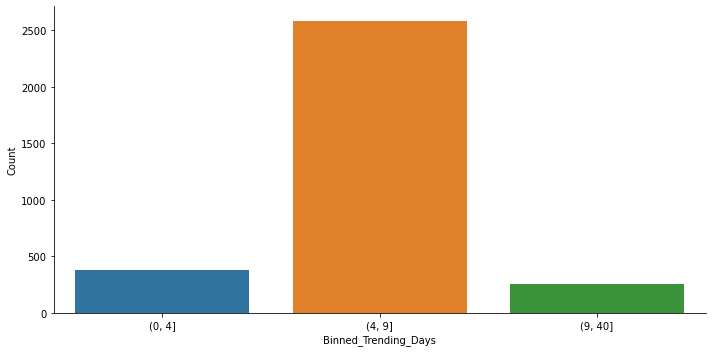

In [77]:
sns.catplot( y='Count',x='Binned_Trending_Days',\
            data=trending_days_binned_count,kind='bar', aspect = 2)

In [78]:
X = df2.drop('total_trending_days',axis=1)
Y = df2.total_trending_days

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                            test_size=0.3,random_state=0)

In [80]:
from sklearn import linear_model

In [81]:
regr = linear_model.LinearRegression()

In [82]:
regr = linear_model.LinearRegression()

In [83]:
regr.fit(X_train,Y_train)

LinearRegression()

In [84]:
y_pred = regr.predict(X_test)

In [85]:
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [ 6.68954621e-08 -2.02054347e-07 -8.32813594e-06 -5.87925314e-07
  4.41524254e-01 -5.33999269e-02 -1.72522443e-01  2.73293927e-03
  7.26744199e-02  5.83833471e-06  1.52107466e-02]


In [86]:
r2_score=sklearn.metrics.r2_score(Y_test, y_pred)

In [87]:
print("Coefficient of determination: %.2f" % r2_score)

Coefficient of determination: 0.48


In [88]:
(y_pred-Y_test).abs().mean()

1.5461079290463973

In [89]:
((y_pred-Y_test)**2).mean()

4.934681675908439

In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [103]:
#pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [109]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, RepeatedKFold


In [105]:
def base_models():
  models = dict()
  models['lr'] = LinearRegression()
  models["Ridge"] = Ridge()
  models["Lasso"] = Lasso()
  models["Tree"] = DecisionTreeRegressor()
  models["Random Forest"] = RandomForestRegressor()
  models["Bagging"] = BaggingRegressor()
  models["GBM"] = GradientBoostingRegressor()
  
  return models


In [106]:
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = -cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

In [107]:
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

In [110]:
for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>lr 1.575 (0.106)
>Ridge 1.575 (0.106)
>Lasso 1.551 (0.111)
>Tree 0.506 (0.113)
>Random Forest 0.577 (0.063)
>Bagging 0.622 (0.069)
>GBM 0.981 (0.075)


In [111]:
regressmod = pd.DataFrame(np.transpose(results), columns = ["lr","Ridge","Lasso","Tree","Random Forest","Bagging","GBM"])
regressmod = pd.melt(regressmod.reset_index(), id_vars='index',value_vars=["lr","Ridge","Lasso","Tree","Random Forest","Bagging","GBM"])

In [112]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = px.box(regressmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "RMS Error"
        },title="Model Performance")
fig.show()

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('Tree', DecisionTreeRegressor()))
  level0.append(('RF', RandomForestRegressor()))
  level0.append(('Bagging', BaggingRegressor()))
  level0.append(('GBM', GradientBoostingRegressor()))
	# define meta learner model
  level1 = LGBMRegressor()
	# define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

def base_models():
  models = dict()
  models["Tree"] = DecisionTreeRegressor()
  models["Random Forest"] = RandomForestRegressor()
  models["Bagging"] = BaggingRegressor()
#   models["XGB"] = XGBRegressor()
  models["Stacked Model"] = get_stacking()
  return models

# Function to evaluate the list of models
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = -cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>Tree 0.505 (0.094)
>Random Forest 0.582 (0.065)
>Bagging 0.626 (0.055)
>Stacked Model 0.587 (0.061)


Test score: 87.56 %


Text(0.5, 1.0, 'Predicted vs Actual')

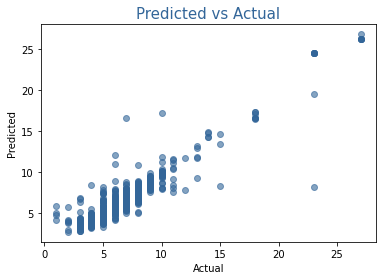

In [114]:
import pickle

level0 = list()
level0.append(('Tree', DecisionTreeRegressor()))
level0.append(('RF', RandomForestRegressor()))
level0.append(('GBM', GradientBoostingRegressor()))
level0.append(('Bagging', BaggingRegressor()))

level1 = LGBMRegressor()
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train, Y_train)

# Save to file in the current working directory
pkl_filename = "AssignmentPickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)


score = pickle_model.score(X_test, Y_test)
print("Test score: {0:.2f} %".format(100 * score))
Y_predict = pickle_model.predict(X_test)


import matplotlib.pyplot as plt
import seaborn as sns
predictions = pd.DataFrame(Y_predict, columns=['predictions'])
predictions['actual'] = Y_test
plt.scatter(x = Y_test, y = Y_predict, color='#336699',alpha=0.6)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual', fontsize=15, color='#336699',loc='center')